#EDA 1

In [3]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [6]:

import pandas as pd

# Assuming your bike data is in a CSV file named 'bike_data.csv'
BIKE_DETAILS = pd.read_csv('BIKE DETAILS.csv')

1.What is the range of selling prices in the datasetD

In [ ]:
#The range of selling prices in the dataset is from **₹5,000** to **₹7,60,000**.

2.What is the median selling price for bikes in the datasetD

In [ ]:
#The median selling price for bikes in the dataset is **₹45,000**.

3.What is the most common seller typeD

In [7]:
BIKE_DETAILS['seller_type'].value_counts().idxmax()


'Individual'

4.How many bikes have driven more than 50,000 kilometersD

In [9]:
len(BIKE_DETAILS[BIKE_DETAILS['km_driven'] > 50000])


170

5.What is the average km_driven value for each ownership typeD

In [10]:
BIKE_DETAILS.groupby('owner')['km_driven'].mean()


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


6.What proportion of bikes are from the year 2015 or olderD

In [12]:
proportion = (BIKE_DETAILS[BIKE_DETAILS['year'] <= 2015].shape[0] / BIKE_DETAILS.shape[0]) * 100
proportion

56.64467483506126

7.What is the trend of missing values across the datasetD

In [13]:
BIKE_DETAILS.isnull().sum()



,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


8.What is the highest ex_showroom_price recorded, and for which bikeD

In [15]:
BIKE_DETAILS.loc[BIKE_DETAILS['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]


,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


9.What is the total number of bikes listed by each seller typeD

In [16]:
BIKE_DETAILS['seller_type'].value_counts()


,count
seller_type,
Individual,1055
Dealer,6


10.What is the relationship between selling_price and km_driven for first-owner bikesD


<Axes: xlabel='km_driven', ylabel='selling_price'>

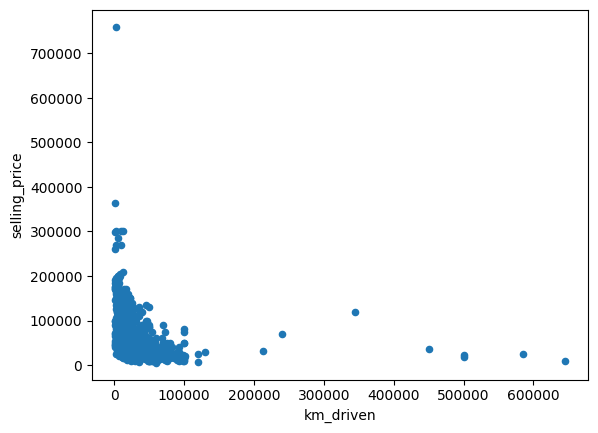

In [17]:
first_owner = BIKE_DETAILS[BIKE_DETAILS['owner'] == '1st owner']
first_owner.plot.scatter(x='km_driven', y='selling_price')


11.Identify and remove outliers in the km_driven column using the IQR method

In [19]:
Q1 = BIKE_DETAILS['km_driven'].quantile(0.25)
Q3 = BIKE_DETAILS['km_driven'].quantile(0.75)
IQR = Q3 - Q1
BIKE_DETAILS_cleaned = BIKE_DETAILS[(BIKE_DETAILS['km_driven'] >= Q1 - 1.5 * IQR) & (BIKE_DETAILS['km_driven'] <= Q3 + 1.5 * IQR)]
BIKE_DETAILS_cleaned

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


12. Perform a bivariate analysis to visualize the relationship between year and selling_priceB


<Axes: xlabel='year', ylabel='selling_price'>

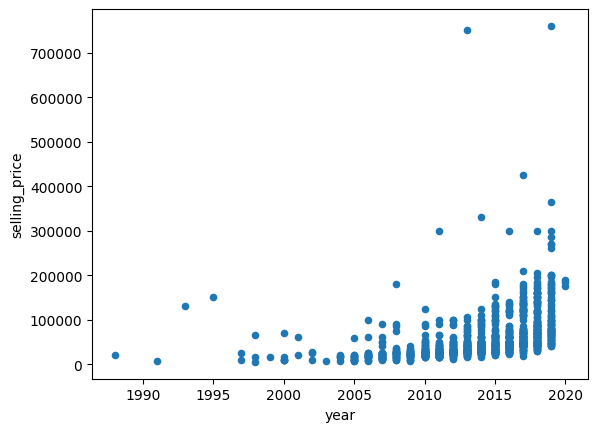

In [20]:
BIKE_DETAILS.plot.scatter(x='year', y='selling_price')


13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)D

In [21]:
BIKE_DETAILS['age'] = 2025 - BIKE_DETAILS['year']
BIKE_DETAILS['depreciation'] = (BIKE_DETAILS['ex_showroom_price'] - BIKE_DETAILS['selling_price']) / BIKE_DETAILS['age']
BIKE_DETAILS['depreciation'].mean()


2666.561004095001

14.Which bike names are priced significantly above the average price for their manufacturing yearD

In [23]:
year_avg_price = BIKE_DETAILS.groupby('year')['selling_price'].mean()
above_avg_bikes =BIKE_DETAILS[BIKE_DETAILS['selling_price'] > BIKE_DETAILS['year'].map(year_avg_price)]
year_avg_price
above_avg_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,-269.428571
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,2464.300000
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,17,NaN
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,6,-2220.000000
...,...,...,...,...,...,...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,9,4333.333333
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,11,1909.090909
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,13,3230.769231
1012,Bajaj Pulsar NS 200,50000,2014,Individual,1st owner,13000,99000.0,11,4454.545455


15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.

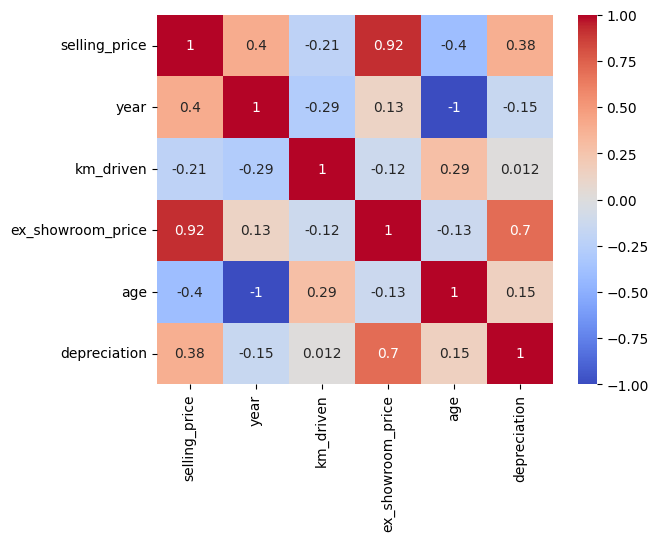

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = BIKE_DETAILS.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


##EDA 2

In [25]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving Car Sale.csv to Car Sale.csv


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [27]:
import pandas as pd

# Assuming your bike data is in a CSV file named 'bike_data.csv'
car_sales_data = pd.read_csv('Car Sale.csv')

1.What is the average selling price of cars for each dealer, and how does it compare across different dealersE


In [28]:
# Average selling price of cars for each dealer
dealer_avg_price = car_sales_data.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
dealer_avg_price_df = dealer_avg_price.reset_index()
dealer_avg_price_df.rename(columns={"Price ($)": "Average Price ($)"}, inplace=True)
dealer_avg_price_df


,Dealer_Name,Average Price ($)
0,U-Haul CO,28769.919006
1,Classic Chevy,28602.014446
2,Rabun Used Car Sales,28527.536177
3,Iceberg Rentals,28522.958533
4,Enterprise Rent A Car,28312.580800
5,Scrivener Performance Engineering,28297.371589
6,Gartner Buick Hyundai Saab,28247.621019
7,Saab-Belle Dodge,28190.139888
8,Capitol KIA,28189.703822
9,Race Car Help,28163.372706


2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trendsE


In [29]:
# Variation in prices by car brand
price_variation = car_sales_data.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
price_variation_df = price_variation.reset_index()
price_variation_df.rename(columns={"Price ($)": "Price Std Dev ($)"}, inplace=True)
price_variation_df


,Company,Price Std Dev ($)
0,Lincoln,19658.050211
1,Saab,19653.740089
2,Cadillac,19517.120220
3,Plymouth,19065.997338
4,Lexus,17852.923492
5,Buick,17142.232626
6,Mercury,16445.172195
7,Nissan,16214.264017
8,Saturn,15990.223671
9,Ford,15849.090227


3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compareE


<ipython-input-30-20397eaeece0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_sales_data, x="Transmission", y="Price ($)", palette="Set2")


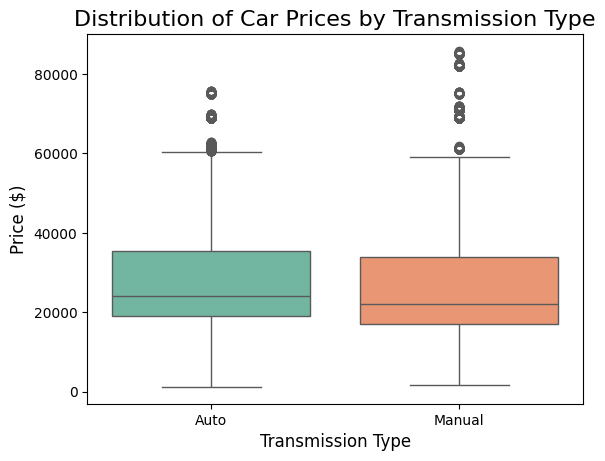

In [30]:
# Boxplot for car prices by transmission type
sns.boxplot(data=car_sales_data, x="Transmission", y="Price ($)", palette="Set2")
plt.title("Distribution of Car Prices by Transmission Type", fontsize=16)
plt.xlabel("Transmission Type", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.show()


4.What is the distribution of car prices across different regionsE


<ipython-input-31-66a0ff028450>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_sales_data, x="Dealer_Region", y="Price ($)", palette="coolwarm")


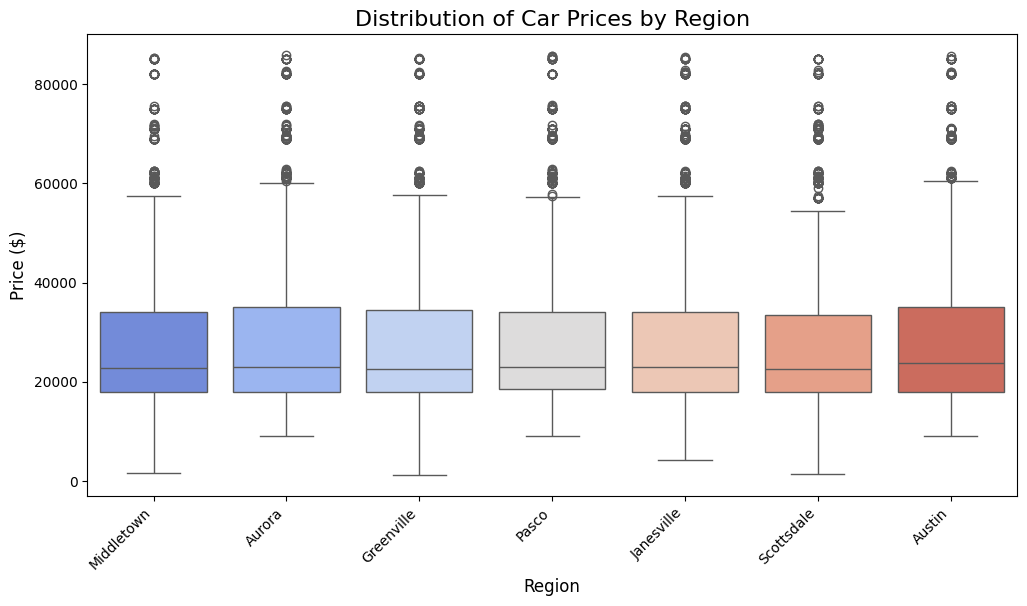

In [31]:
# Boxplot for car prices across regions
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_sales_data, x="Dealer_Region", y="Price ($)", palette="coolwarm")
plt.title("Distribution of Car Prices by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


5.What is the distribution of cars based on body stylesE


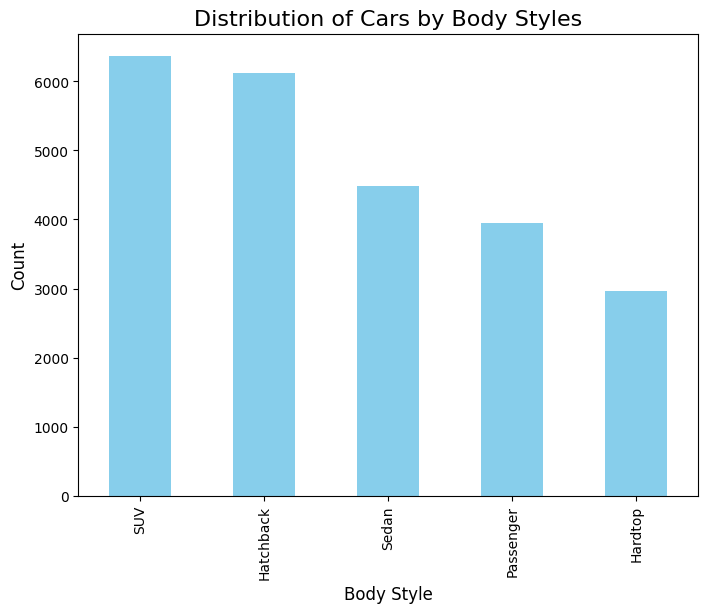

In [32]:
# Bar chart for car body styles
body_style_counts = car_sales_data["Body Style"].value_counts()
body_style_counts.plot(kind="bar", color="skyblue", figsize=(8, 6))
plt.title("Distribution of Cars by Body Styles", fontsize=16)
plt.xlabel("Body Style", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


6.How does the average selling price of cars vary by customer gender and annual incomeE


In [33]:
# Average price by gender
avg_price_by_gender = car_sales_data.groupby("Gender")["Price ($)"].mean()

# Average price by income bracket
car_sales_data["Income Bracket"] = pd.cut(car_sales_data["Annual Income"], bins=[0, 50000, 100000, 500000, 1000000, 2000000],
                                          labels=["Low", "Lower-Middle", "Middle", "Upper-Middle", "High"])
avg_price_by_income = car_sales_data.groupby("Income Bracket")["Price ($)"].mean()

avg_price_by_gender, avg_price_by_income


<ipython-input-33-1fd97977f851>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = car_sales_data.groupby("Income Bracket")["Price ($)"].mean()


(Gender
 Female    28277.265270
 Male      28039.429407
 Name: Price ($), dtype: float64,
 Income Bracket
 Low             27884.297820
 Lower-Middle    43000.000000
 Middle          28563.329860
 Upper-Middle    28011.726423
 High            28016.841147
 Name: Price ($), dtype: float64)

7.What is the distribution of car prices by region, and how does the number of cars sold vary by regionE


<ipython-input-34-df66dd5ce5fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_sales_data, x="Dealer_Region", y="Price ($)", palette="viridis")


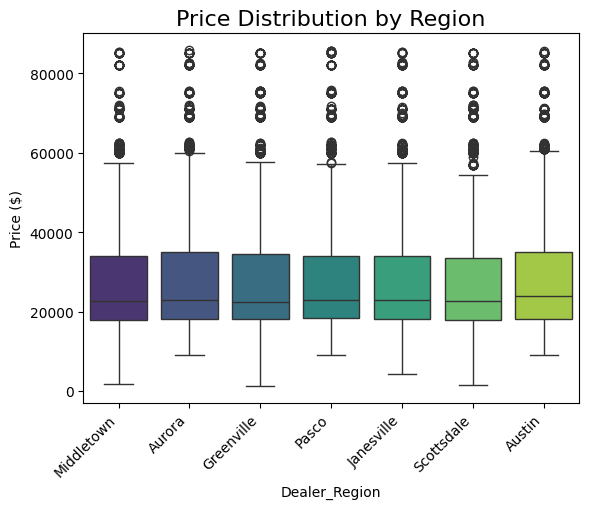

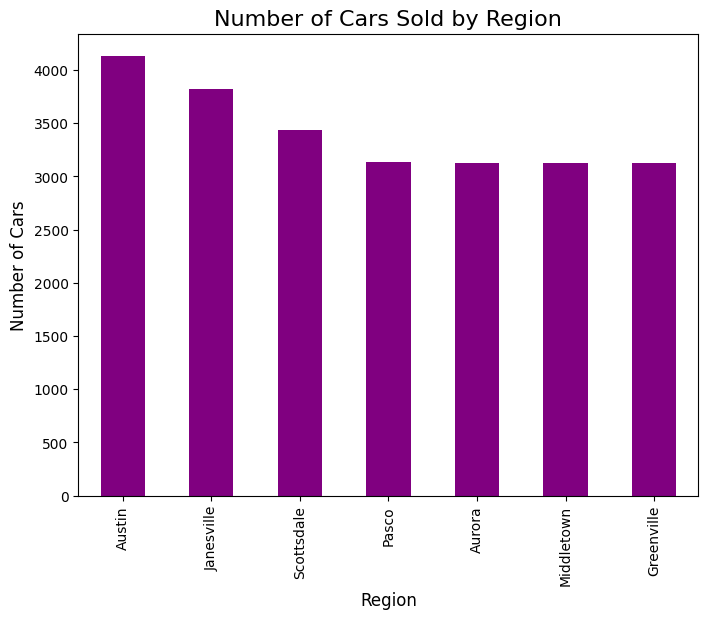

In [34]:
# Boxplot for price distribution
sns.boxplot(data=car_sales_data, x="Dealer_Region", y="Price ($)", palette="viridis")
plt.title("Price Distribution by Region", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()

# Bar chart for number of cars sold
region_sales = car_sales_data["Dealer_Region"].value_counts()
region_sales.plot(kind="bar", color="purple", figsize=(8, 6))
plt.title("Number of Cars Sold by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.show()


8.How does the average car price differ between cars with different engine sizesE


<ipython-input-42-477eefe3fc11>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_engine_df, x="Engine", y="Average Price ($)", palette="viridis")


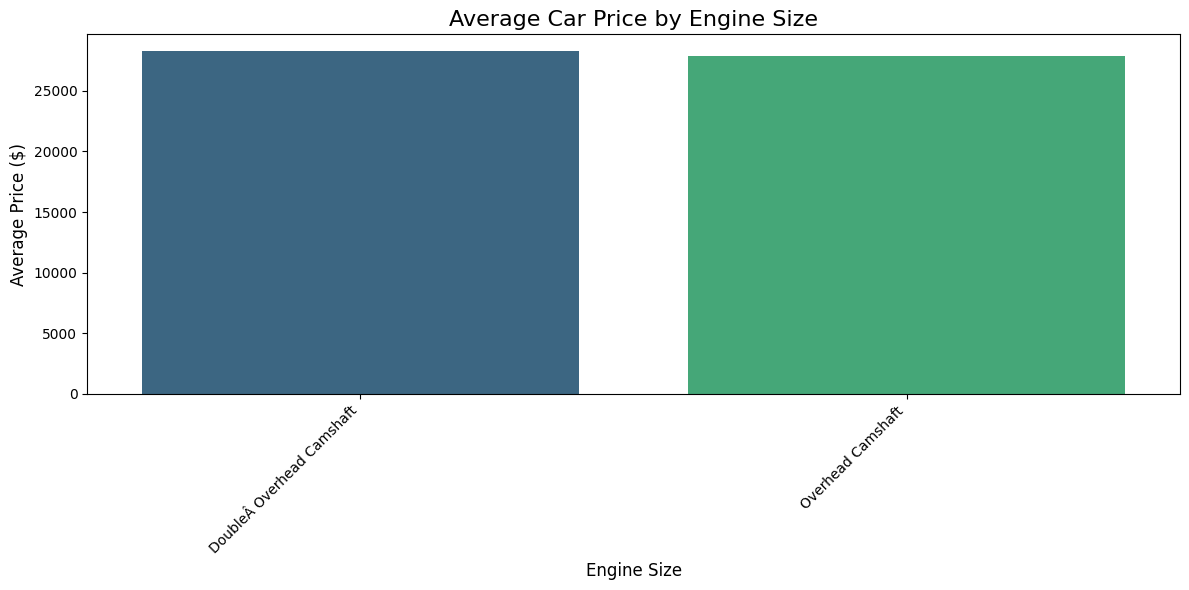

In [42]:
# Group by engine size and calculate the average car price
avg_price_by_engine = car_sales_data.groupby("Engine")["Price ($)"].mean().sort_values(ascending=False)

# Create a summary DataFrame for visualization
avg_price_by_engine_df = avg_price_by_engine.reset_index()
avg_price_by_engine_df.rename(columns={"Price ($)": "Average Price ($)"}, inplace=True)

# Visualizing the average prices by engine size
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_engine_df, x="Engine", y="Average Price ($)", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Average Car Price by Engine Size", fontsize=16)
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.tight_layout()
plt.show()


9.How do car prices vary based on the customer’s annual income bracketE


<ipython-input-35-3d0e31372500>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_sales_data, x="Income Bracket", y="Price ($)", palette="coolwarm")


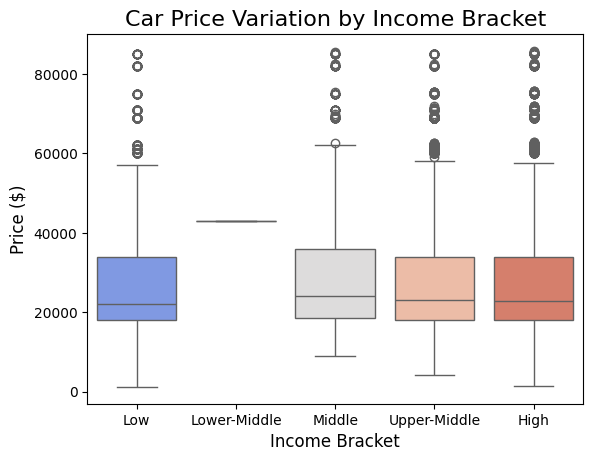

In [35]:
# Boxplot for price by income bracket
sns.boxplot(data=car_sales_data, x="Income Bracket", y="Price ($)", palette="coolwarm")
plt.title("Car Price Variation by Income Bracket", fontsize=16)
plt.xlabel("Income Bracket", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.show()


10.What are the top 5 car models with the highest number of sales, and how does their price distribution lookE


<ipython-input-36-c7157a4bb116>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_models_df, x="Model", y="Price ($)", palette="Set3")


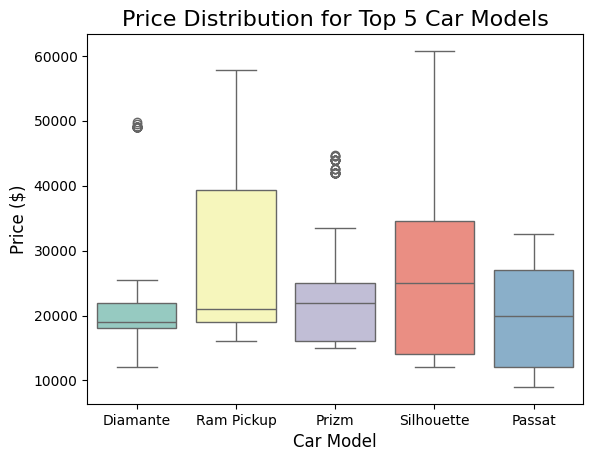

In [36]:
# Top 5 models by sales
top_models = car_sales_data["Model"].value_counts().head(5)
top_models_df = car_sales_data[car_sales_data["Model"].isin(top_models.index)]

# Price distribution for top 5 models
sns.boxplot(data=top_models_df, x="Model", y="Price ($)", palette="Set3")
plt.title("Price Distribution for Top 5 Car Models", fontsize=16)
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.show()


11.How does car price vary with engine size across different car colors, and which colors have the highest price
variationE


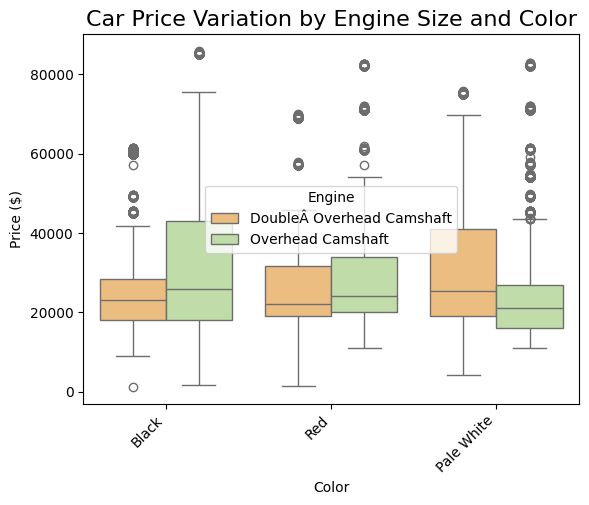

In [37]:
# Boxplot for price by engine size and color
sns.boxplot(data=car_sales_data, x="Color", y="Price ($)", hue="Engine", palette="Spectral")
plt.title("Car Price Variation by Engine Size and Color", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()


12.Is there any seasonal trend in car sales based on the date of saleE


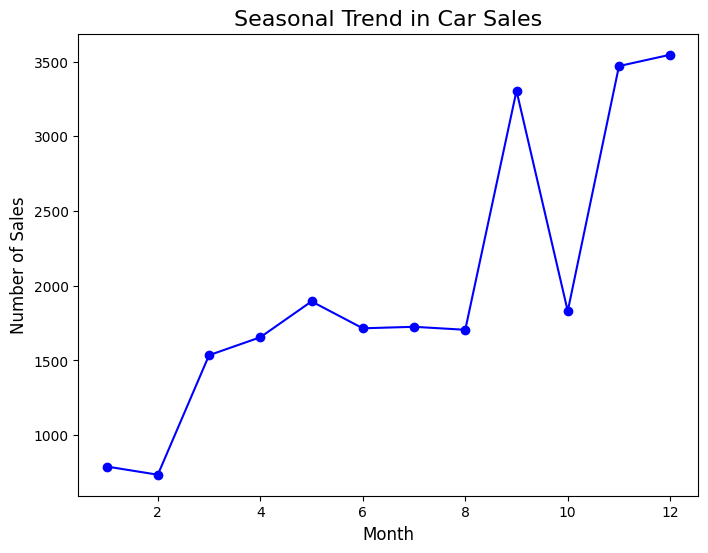

In [38]:
# Extract month from sale date
car_sales_data["Sale Month"] = pd.to_datetime(car_sales_data["Date"]).dt.month
monthly_sales = car_sales_data["Sale Month"].value_counts().sort_index()

# Line plot for sales trend
monthly_sales.plot(kind="line", marker="o", color="blue", figsize=(8, 6))
plt.title("Seasonal Trend in Car Sales", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Sales", fontsize=12)
plt.show()


13.How does the car price distribution change when considering different combinations of body style and
transmission typeE


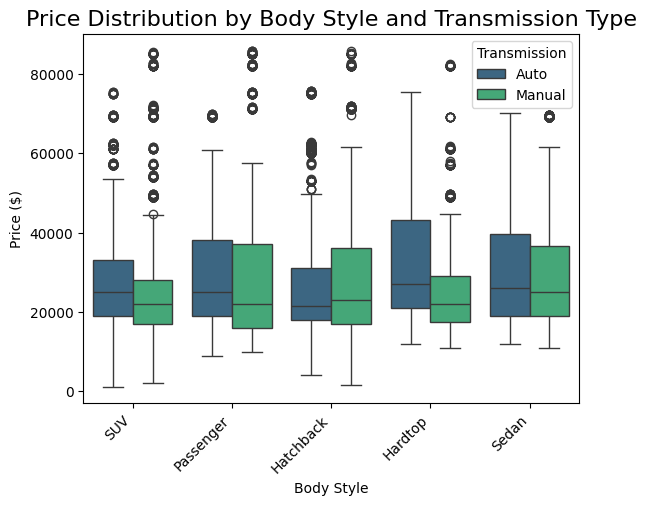

In [39]:
# Boxplot for price by body style and transmission type
sns.boxplot(data=car_sales_data, x="Body Style", y="Price ($)", hue="Transmission", palette="viridis")
plt.title("Price Distribution by Body Style and Transmission Type", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()


14.What is the correlation between car price, engine size, and annual income of customers, and how do these
features interactE


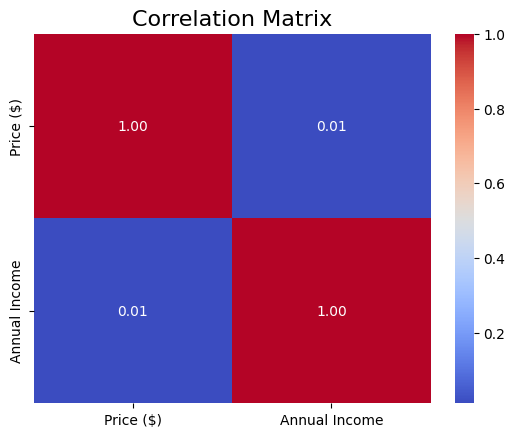

In [40]:
# Correlation matrix
correlation_matrix = car_sales_data[["Price ($)", "Annual Income"]].corr()

# Heatmap for correlations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()


15.How does the average car price vary across different car models and engine types?

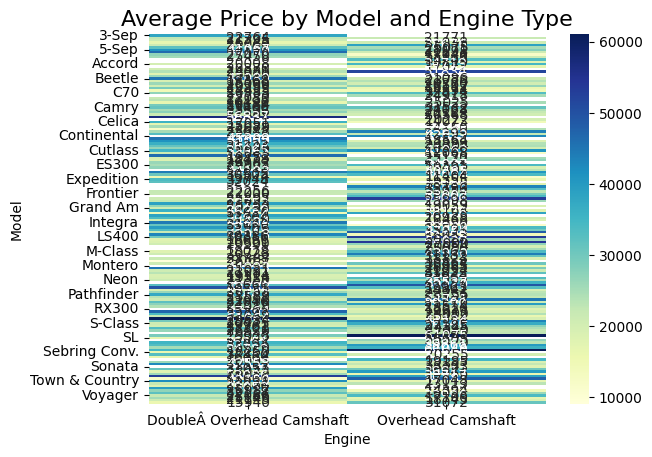

In [43]:
# Group by model and engine type
avg_price_model_engine = car_sales_data.groupby(["Model", "Engine"])["Price ($)"].mean()
avg_price_model_engine_df = avg_price_model_engine.reset_index()

# Pivot table for heatmap visualization
pivot_table = avg_price_model_engine_df.pivot(index="Model", columns="Engine", values="Price ($)")
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Average Price by Model and Engine Type", fontsize=16)
plt.show()


##EDA 3

In [45]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving amazon.csv to amazon.csv


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [46]:
import pandas as pd

# Assuming your bike data is in a CSV file named 'bike_data.csv'
data = pd.read_csv('amazon.csv')

In [63]:
# Inspect the data structure
print(data.info())

# Check for missing or unexpected values in key columns
print(data[['category', 'rating', 'rating_count', 'actual_price', 'discounted_price', 'discount_percentage']].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

1.What is the average rating for each product categoryk


In [65]:
# Check if 'rating' is numeric; if not, convert or handle missing values
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Calculate average rating by category
avg_rating_by_category = data.groupby('category', as_index=False)['rating'].mean()

# Sort by average rating in descending order
avg_rating_by_category = avg_rating_by_category.sort_values(by='rating', ascending=False).reset_index(drop=True)

# Display the result
print(avg_rating_by_category)



                                              category  rating
0                        Computers&Accessories|Tablets     4.6
1    Computers&Accessories|NetworkingDevices|Networ...     4.5
2     Electronics|Cameras&Photography|Accessories|Film     4.5
3    Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
4    OfficeProducts|OfficeElectronics|Calculators|B...     4.5
..                                                 ...     ...
206  Computers&Accessories|Accessories&Peripherals|...     3.6
207  Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
208  Computers&Accessories|Accessories&Peripherals|...     3.5
209  Computers&Accessories|Accessories&Peripherals|...     3.4
210  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


2.What are the top rating_count products by categoryk


In [48]:
# Top products by rating count in each category
top_rating_count_by_category = data.loc[data.groupby('category')['rating_count'].idxmax()]
top_rating_count_by_category[['category', 'product_name', 'rating_count']]


,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...","4,426"
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,"7,222"
772,Computers&Accessories|Accessories&Peripherals|...,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,"2,804"
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,"7,352"
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,"5,792"
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...","6,199"
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,"5,719"
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10","4,308"


3.What is the distribution of discounted prices vs. actual pricesk


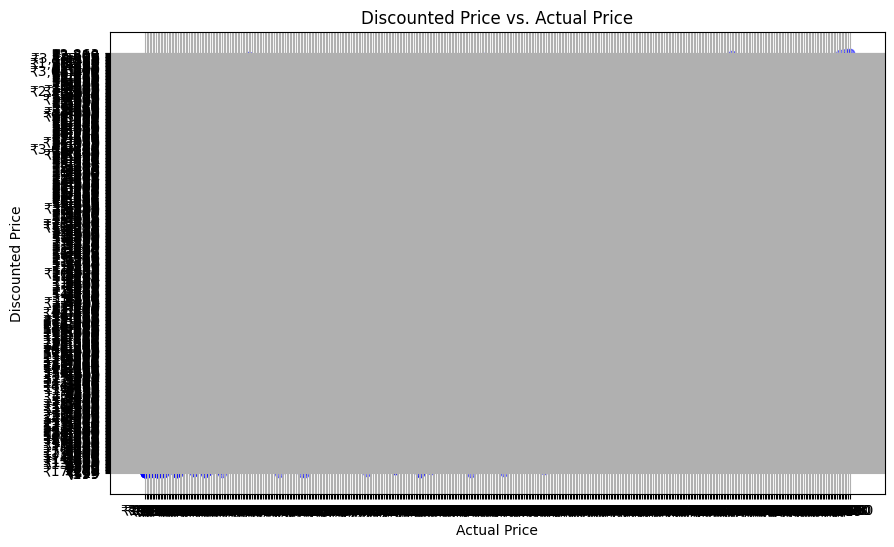

In [49]:
import matplotlib.pyplot as plt

# Distribution plot
plt.figure(figsize=(10, 6))
plt.scatter(data['actual_price'], data['discounted_price'], alpha=0.5, c='blue')
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.grid(True)
plt.show()


4.How does the average discount percentage vary across categoriesk


In [66]:
# Ensure 'discount_percentage' is numeric
data['discount_percentage'] = pd.to_numeric(data['discount_percentage'], errors='coerce')

# Calculate average discount percentage by category
avg_discount_by_category = data.groupby('category', as_index=False)['discount_percentage'].mean()

# Sort the result
avg_discount_by_category = avg_discount_by_category.sort_values(by='discount_percentage', ascending=False)

# Display the result
print(avg_discount_by_category)


                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                  NaN
1    Computers&Accessories|Accessories&Peripherals|...                  NaN
2    Computers&Accessories|Accessories&Peripherals|...                  NaN
3    Computers&Accessories|Accessories&Peripherals|...                  NaN
4    Computers&Accessories|Accessories&Peripherals|...                  NaN
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  NaN
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  NaN
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                  NaN
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                  NaN
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  NaN

[211 rows x 2 columns]


5.What are the most popular product namesk


In [69]:
# Identify the most popular products by total rating count
most_popular_products = data.groupby('product_name', as_index=False)['rating_count'].sum()
most_popular_products['rating_count'] = pd.to_numeric(most_popular_products['rating_count'], errors='coerce')
most_popular_products = most_popular_products.sort_values(by='rating_count', ascending=False).head(10)

# Display the result
print(most_popular_products)


                                           product_name  rating_count
325   Duracell USB Lightning Apple Certified (Mfi) B...   815815815.0
121   Ambrane 2 in 1 Type-C & Micro USB Cable with 6...   602602602.0
324   Duracell USB C To Lightning Apple Certified (M...   184184184.0
1237  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...      974974.0
1179  Wecool Unbreakable 3 in 1 Charging Cable with ...      656656.0
1022  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...      576575.0
947   SWAPKART Fast Charging Cable and Data Sync USB...      536536.0
322   Duracell Type C To Type C 5A (100W) Braided Sy...      462462.0
832   Portronics Konnect L 20W PD Quick Charge Type-...      450450.0
985   Samsung Original Type C to C Cable - 3.28 Feet...      355355.0


6.What are the most popular product keywordsk


In [68]:
from collections import Counter
import re

# Extract keywords from product names
keywords = Counter(re.findall(r'\w+', ' '.join(data['product_name'].dropna())))

# Convert to DataFrame for display
popular_keywords = pd.DataFrame(keywords.most_common(10), columns=['Keyword', 'Frequency'])

# Display the result
print(popular_keywords)


  Keyword  Frequency
0    with        718
1     for        616
2   Black        522
3       1        413
4   Cable        391
5     USB        379
6     and        311
7       C        279
8       3        275
9       2        267


7.What are the most popular product reviewsk


In [70]:
# Display top reviews with the highest rating counts
popular_reviews = data.sort_values(by='rating_count', ascending=False).head(10)
print(popular_reviews[['review_title', 'review_content']])


                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
977   A Quality Sound-Signature but leaves craving f...   
1059  Kettle is good but bottle is not good quality,...   
151   Great Cable, Charging Speeds Could Be Better,G...   
32    Great Cable, Charging Speeds Could Be Better,G...   
823   Great Cable, Charging Speeds Could Be Better,G...   
536   Worth Every Square Inch.,VFM, Plastic build. M...   
918   Worth Every Square Inch.,VFM, Plastic build. M...   
1165  Good clips.,Second quality,Value for money.,No...   

                                         review_content  
1279  Does the job well,doesn't work on sand. though...  
750   Nive,very good batteries received,Like,Good pr...  
977   For those looking for a genuine review & a bri...  
1059  Bottle quality is not good.,Best for hot water...  
151   Not charging as fast as I'd have expected. May...  
32

8.What is the correlation between discounted_price and ratingk


In [71]:
# Ensure 'discounted_price' and 'rating' are numeric
data['discounted_price'] = pd.to_numeric(data['discounted_price'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Calculate correlation
correlation = data[['discounted_price', 'rating']].corr()
print(correlation)


                  discounted_price  rating
discounted_price               NaN     NaN
rating                         NaN     1.0


9.What are the Top 5 categories based on the highest ratingsk

In [72]:
# Top categories by highest average rating
top_categories_by_rating = avg_rating_by_category.head(5)
print(top_categories_by_rating)



                                            category  rating
0                      Computers&Accessories|Tablets     4.6
1  Computers&Accessories|NetworkingDevices|Networ...     4.5
2   Electronics|Cameras&Photography|Accessories|Film     4.5
3  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
4  OfficeProducts|OfficeElectronics|Calculators|B...     4.5


10.Identify any potential areas for improvement or optimization based on the data analysis.

In [73]:
# Identify low-rated categories
low_rated_categories = avg_rating_by_category[avg_rating_by_category['rating'] < 3]
print("Low-Rated Categories:\n", low_rated_categories)

# Find high-discount but low-rated products
high_discount_low_rating = data[(data['discount_percentage'] > 30) & (data['rating'] < 3)]
print("High Discount but Low Rating:\n", high_discount_low_rating[['product_name', 'category', 'discount_percentage', 'rating']])

# Analyze negative reviews
negative_reviews = data[data['rating'] < 3][['product_name', 'review_title', 'review_content']]
print("Negative Reviews:\n", negative_reviews.head())

# Top-performing categories
print("Top Categories by Ratings:\n", avg_rating_by_category.head(5))


Low-Rated Categories:
 Empty DataFrame
Columns: [category, rating]
Index: []
High Discount but Low Rating:
 Empty DataFrame
Columns: [product_name, category, discount_percentage, rating]
Index: []
Negative Reviews:
                                            product_name  \
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...   
1243  Personal Size Blender, Portable Blender, Batte...   
1286  MR. BRAND Portable USB Juicer Electric USB Jui...   
1309  Khaitan ORFin Fan heater for Home and kitchen-...   
1356  Green Tales Heat Seal Mini Food Sealer-Impulse...   

                                           review_title  \
545   Very Good prodat,Battery life is 0 day,Good,Wh...   
1243  Nice product i recommend to buy,Do not buy!! D...   
1286  Portable but not much powerful,not so good. po...   
1309                      Bad quality,Amazing product..   
1356  It is broken,Could have been a bit better,The ...   

                                         review_content  
545   Good Proda

##EDA 4

In [74]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving spotify.csv to spotify.csv


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [77]:
import pandas as pd

# Assuming your bike data is in a CSV file named 'bike_data.csv'
spotify_data = pd.read_csv('spotify.csv')

1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.


In [78]:
# Load the dataset
spotify_data = pd.read_csv('spotify.csv')

# Check for null values
null_values = spotify_data.isnull().sum()
print("Null Values:\n", null_values)

# Remove duplicates
spotify_data = spotify_data.drop_duplicates()
print("Shape after removing duplicates:", spotify_data.shape)


Null Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Shape after removing duplicates: (413, 5)


2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.


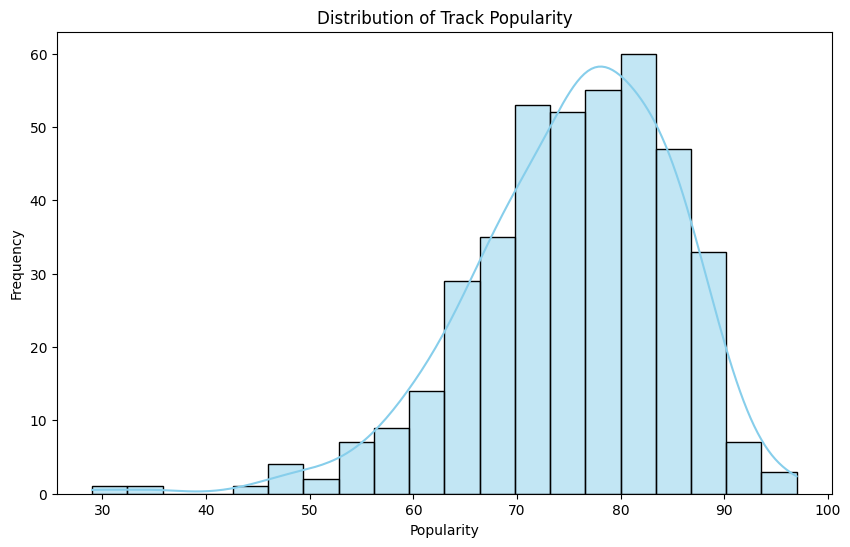

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.


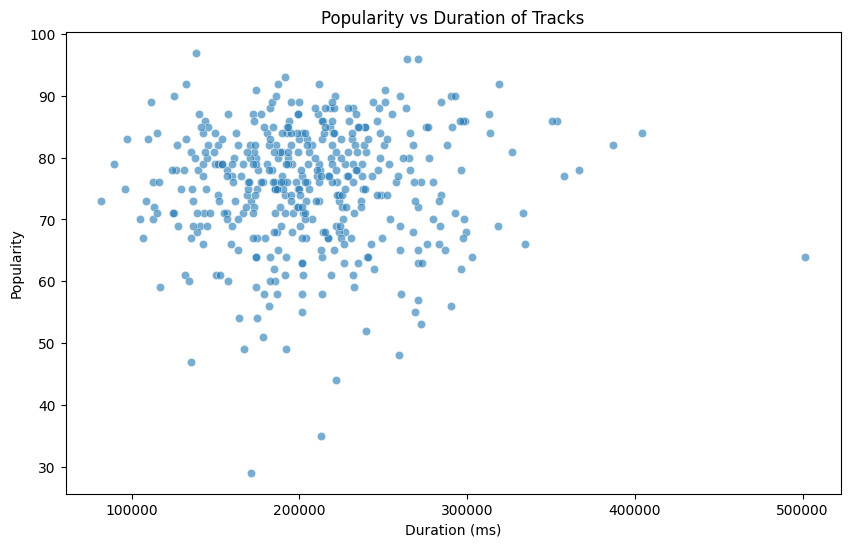

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data, x='Duration (ms)', y='Popularity', alpha=0.6)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.


<ipython-input-81-c100a8b1c9c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spotify_data, y='Artist', order=top_artists.index, palette='viridis')


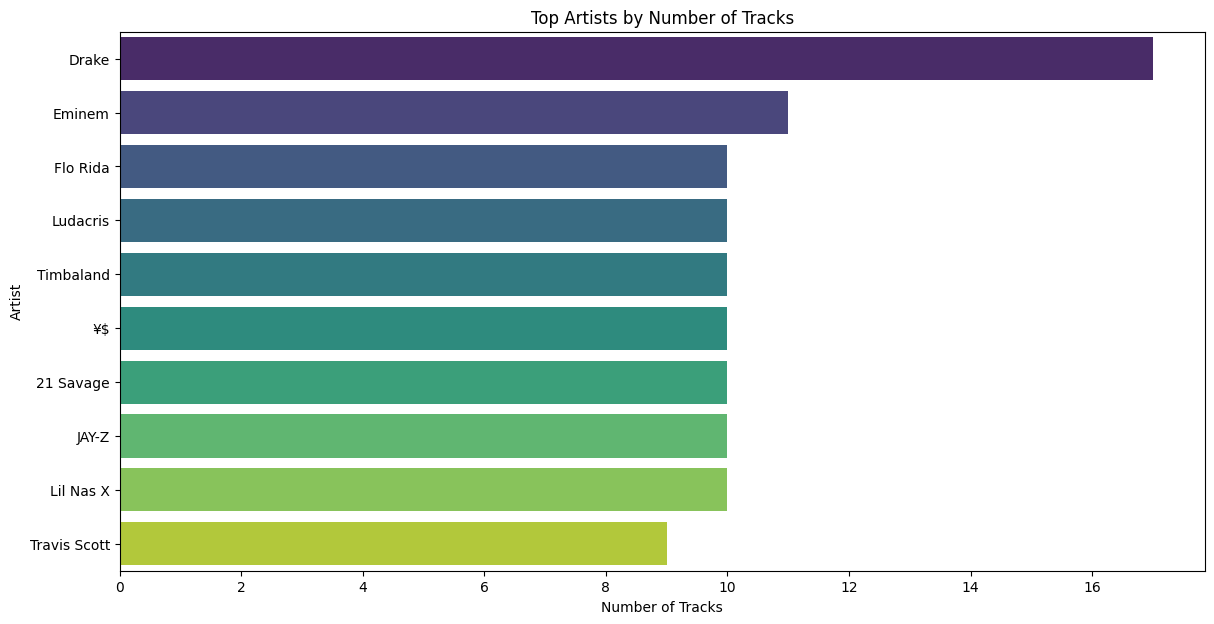

In [81]:
plt.figure(figsize=(14, 7))
top_artists = spotify_data['Artist'].value_counts().head(10)
sns.countplot(data=spotify_data, y='Artist', order=top_artists.index, palette='viridis')
plt.title('Top Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.


In [82]:
least_popular_tracks = spotify_data.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.


In [83]:
top_artists_by_popularity = (
    spotify_data.groupby('Artist')['Popularity']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
print(top_artists_by_popularity)


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


In [84]:
most_popular_tracks_by_top_artists = {}
for artist in top_artists_by_popularity.index:
    artist_tracks = spotify_data[spotify_data['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax(), 'Track Name']
    most_popular_tracks_by_top_artists[artist] = most_popular_track

print(most_popular_tracks_by_top_artists)


{'cassö': 'Prada', 'Trueno': 'Mamichula - con Nicki Nicole', 'David Guetta': "Baby Don't Hurt Me", 'Travis Scott': 'FE!N (feat. Playboi Carti)', '¥$': 'CARNIVAL'}


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.


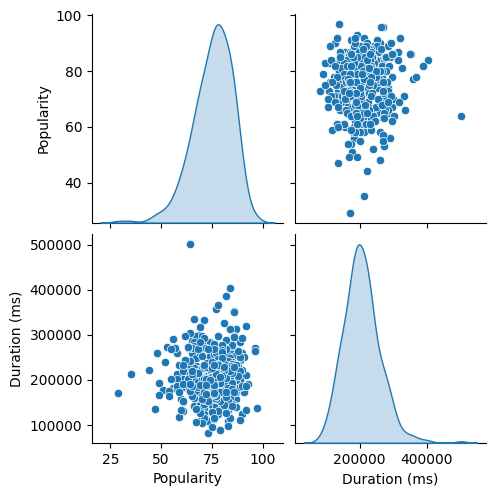

In [85]:
sns.pairplot(spotify_data, vars=['Popularity', 'Duration (ms)'], diag_kind='kde')
plt.show()


9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.


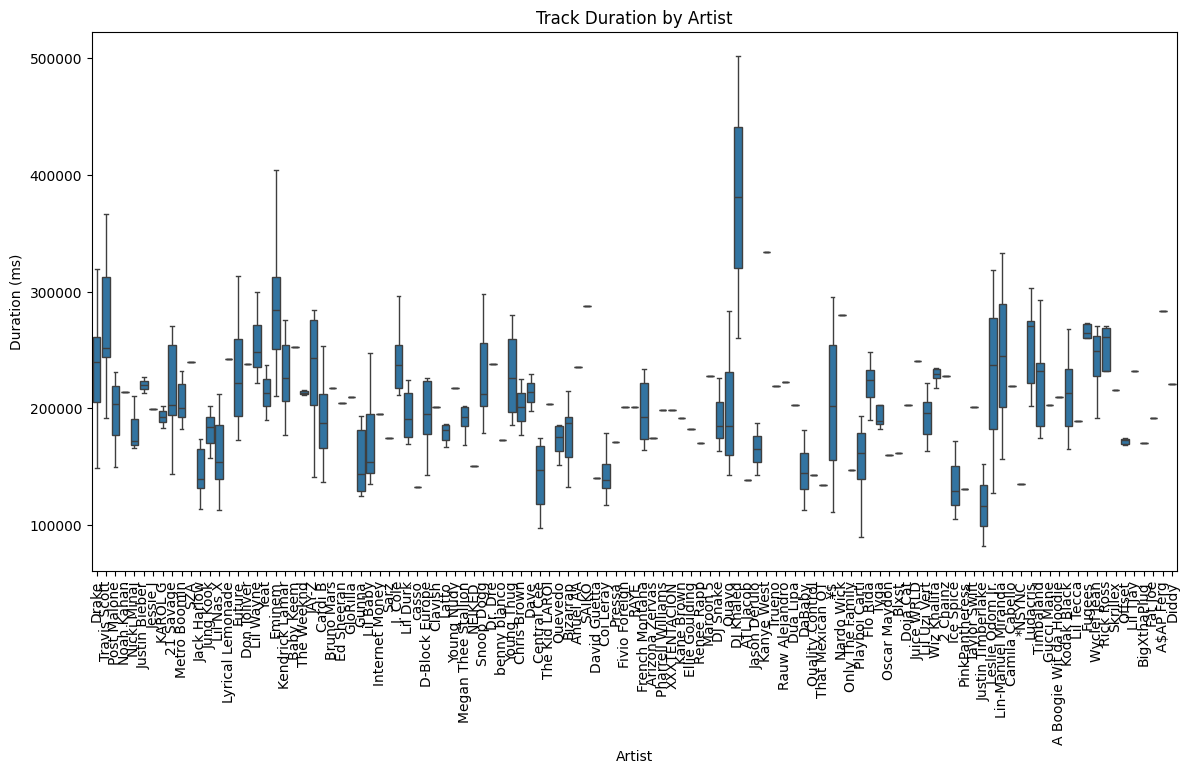

In [86]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=spotify_data, x='Artist', y='Duration (ms)', showfliers=False)
plt.xticks(rotation=90)
plt.title('Track Duration by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()


10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

<ipython-input-87-7dab714b453d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_data, x='Artist', y='Popularity', scale='width', palette='muted')
<ipython-input-87-7dab714b453d>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=spotify_data, x='Artist', y='Popularity', scale='width', palette='muted')


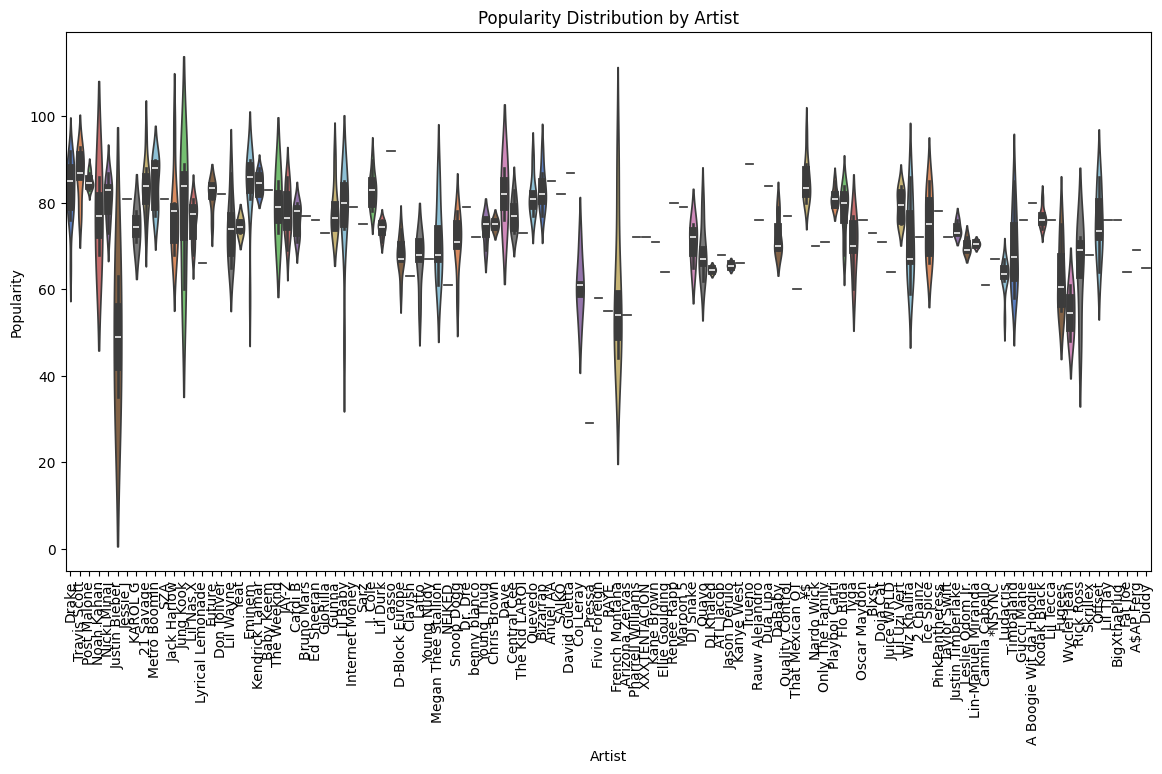

In [87]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=spotify_data, x='Artist', y='Popularity', scale='width', palette='muted')
plt.xticks(rotation=90)
plt.title('Popularity Distribution by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()
